In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_recommenders as tfrs
from typing import Dict, Text

# 1. Setup

Chose the Anime Recommendation Database 2020 dataset on Kaggle

# 2. Data Collection

## 2.1 - Dataset Description

The Anime Recommendation Database 2020 dataset is a dataset that contains data from around 320,000 users and 16,000 anime. The data is gathered from myanimelist.net, a popular anime community and source for anime data. The collector of the data has a github repository with the Jupyter Notebook that shows how he scraped the data from the website. Although the archive for the database contained five data sheets, we will only need two for this recommendation system. The first is 'anime.csv'. This contains data about every anime, including its My Anime List (MAL) ID, the name of the anime, its average rating across all its reviews, the genre(s) of the anime, and much more. This datasheet contains around 109 million rows. The other data sheet used in this project is 'rating_complete.csv'. This contains 57 million ratings on 16,872 anime given by 310,059 users. This data sheet only considers animes that these users have watched completely and have given a score. This dataset only has three columns: 'user_id', 'anime_id', and 'rating'. The 'user_id' column contains a randomly generated user id for each user's rating so that it would not be possible to identify who the actualy reviewer is. The 'anime_id' column contains the MAL ID of the anime reviewed by the user. This is the same MAL ID given to anime in the 'anime.csv' data sheet. Then, the 'rating' columns contains the rating of the anime given by the user. These ratings are numerical, ranging from the lowest rating of 1 (appalling) to the highest rating of 10 (masterpiece). These two datasets give us the necessary tools to create a hybrid recommendation system. The data from 'anime.csv' gives us our content-based filtering while the data from 'rating_complete.csv' gives us our collaborative filtering. 

# 3. Data Preprocessing

## 3.1 - Data Cleaning

### 1. Perform initial data exploration

#### Exploration on anime.csv

In [52]:
anime_df = pd.read_csv("anime.csv")
anime_df.shape

(17562, 35)

In [53]:
anime_df.sample(10)

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
17489,46925,Ye Xing Xia Ying,Unknown,"Action, Fantasy, Sci-Fi",Dragon Agents,夜刑侠影,ONA,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
5714,9328,Shoujo Senki Soul Eater,6.41,Hentai,Unknown,少女戦機 ソウルイーター,OVA,1,"Sep 24, 2010",Unknown,...,296.0,231.0,428.0,543.0,458.0,330.0,176.0,81.0,82.0,102.0
13346,35983,Harukana Receive,6.7,"Slice of Life, Sports",Harukana Receive,はるかなレシーブ,TV,12,"Jul 6, 2018 to Sep 21, 2018",Summer 2018,...,1097.0,1881.0,5034.0,9955.0,7310.0,3878.0,1441.0,570.0,237.0,162.0
8466,21493,Ninja Hattori-kun: Nin Nin Ninpo Enikki no Maki,6.11,"Comedy, Martial Arts, Slice of Life",Unknown,忍者ハットリくん ニンニン忍法絵日記の巻,Movie,1,"Mar 13, 1982",Unknown,...,15.0,2.0,15.0,28.0,40.0,32.0,9.0,4.0,1.0,6.0
12153,33908,Yasoukyoku,5.69,Music,Unknown,夜想曲,Music,1,"Jan 4, 2011",Unknown,...,7.0,Unknown,6.0,14.0,22.0,27.0,11.0,7.0,4.0,5.0
3746,4617,Nana Toshi Monogatari: Hokkyokukai Sensen,6.25,"Sci-Fi, Drama",Unknown,七都市物語 ～北極海戦線～,OVA,2,"Jun 22, 1994",Unknown,...,18.0,29.0,92.0,212.0,166.0,138.0,51.0,19.0,10.0,5.0
7934,18655,Koikishi Purely☆Kiss The Animation,7.2,"Hentai, Romance",Unknown,恋騎士 Purely☆Kiss The Animation,OVA,2,"Jul 26, 2013 to Feb 28, 2014",Unknown,...,654.0,575.0,1069.0,1213.0,690.0,373.0,129.0,86.0,55.0,60.0
16584,41250,Oshiete Hokusai! The Animation,Unknown,"Slice of Life, Comedy, Fantasy",Unknown,おしえて北斎！ -THE ANIMATION-,ONA,10,"Mar 7, 2021 to Mar 14, 2021",Unknown,...,Unknown,Unknown,Unknown,1.0,2.0,1.0,1.0,Unknown,Unknown,Unknown
14277,37464,Wasurenai yo,Unknown,"Music, Kids",Unknown,忘れないよ,Music,1,"Feb 1, 2018",Unknown,...,5.0,1.0,4.0,9.0,8.0,11.0,3.0,3.0,1.0,4.0
808,893,Dragon Ball Movie 4: Saikyou e no Michi,7.15,"Action, Adventure, Comedy, Fantasy, Sci-Fi, Sh...",Dragon Ball:The Path to Power,ドラゴンボール 最強への道,Movie,1,"Mar 2, 1996",Unknown,...,2563.0,2260.0,4956.0,7691.0,4403.0,2161.0,597.0,214.0,88.0,85.0


In [54]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

In [55]:
anime_df.isna().sum().sum()

0

#### Exploration on rating_complete.csv

In [56]:
ratings_df = pd.read_csv("rating_complete.csv")
ratings_df.shape

(57633278, 3)

In [57]:
ratings_df.sample(10)

,user_id,anime_id,rating
8335786,51099,30,7
4791213,29363,6811,7
36056263,221269,12549,6
23986874,147519,17895,8
35188512,215906,4181,9
5868584,35996,30831,10
33717879,207079,223,9
29914219,184034,11703,7
5460828,33457,11577,7
56270806,345011,18441,7


In [58]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57633278 entries, 0 to 57633277
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 1.3 GB


In [59]:
ratings_df.isna().sum().sum()

0

In [60]:
ratings_df["rating"].median()

8.0

### 2. Address missing data, handle missing data, and justify the chosen method

#### Missing data for 'anime.csv'

In [61]:
# First only get columns that we need
anime_df = anime_df[["MAL_ID", "Name", "Score", "Genres", "Popularity"]]
anime_df

,MAL_ID,Name,Score,Genres,Popularity
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",39
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",518
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",201
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",1467
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",4369
...,...,...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",13116
17558,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",17562
17559,48488,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",17558
17560,48491,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",17565


In [62]:
# Null values are called "unknown" and only are in the "score" and "genres" column
print("Shape before:", anime_df.shape)
anime_df["Score"].replace("Unknown", 0, inplace=True)
anime_df.drop(anime_df[anime_df["Genres"] == "Unknown"].index, inplace=True)
print("Shape after:", anime_df.shape)
anime_df

Shape before: (17562, 5)
Shape after: (17499, 5)


,MAL_ID,Name,Score,Genres,Popularity
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",39
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",518
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",201
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",1467
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",4369
...,...,...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,0,"Adventure, Mystery, Supernatural",13116
17558,48483,Mieruko-chan,0,"Comedy, Horror, Supernatural",17562
17559,48488,Higurashi no Naku Koro ni Sotsu,0,"Mystery, Dementia, Horror, Psychological, Supe...",17558
17560,48491,Yama no Susume: Next Summit,0,"Adventure, Slice of Life, Comedy",17565


In [63]:
anime_df["Score"] = anime_df["Score"].astype("Float64")
anime_df["Popularity"] = anime_df["Popularity"].astype("int64")
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17499 entries, 0 to 17561
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MAL_ID      17499 non-null  int64  
 1   Name        17499 non-null  object 
 2   Score       17499 non-null  Float64
 3   Genres      17499 non-null  object 
 4   Popularity  17499 non-null  int64  
dtypes: Float64(1), int64(2), object(2)
memory usage: 837.4+ KB


In the dataframe, the entries that do not have a value are labelled as "Unknown". Only two columns contain "Unknown" values: the "Score" column and the "Genres" column. For the scores column, I decided to replace the rows with an "Unknown" rating with a rating of 0. This keeps the information given by the anime with an unknown rating without having to remove the row. It also keeps the column free of strings. However, for the "Genres" column, I decided to drop the rows that have unknown genres. This is because without a genre, the row does not give any information for the anime for content based filtering. That is why I decided to drop the rows that did not have a genre.

#### Missing data for 'ratings_complete.csv'

In [64]:
print(len(ratings_df[ratings_df["user_id"] == "Unknown"]))
print(len(ratings_df[ratings_df["anime_id"] == "Unknown"]))
print(len(ratings_df[ratings_df["rating"] == "Unknown"]))

0
0
0


There are no null values or "Unknown" values in the rating dataframe

## 3.2 - Outlier Detection

### Check for outliers with data visualization and treat them

#### anime_df

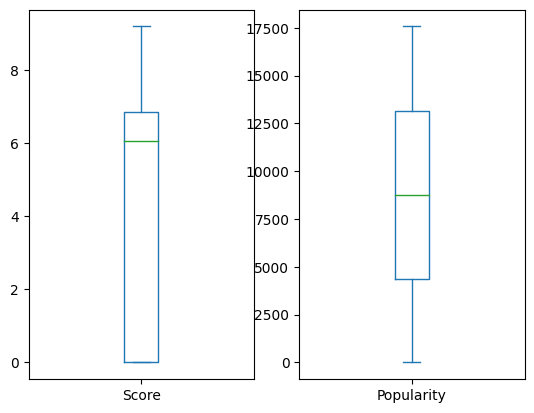

In [65]:
fig, axes = plt.subplots(nrows=1, ncols=2)
anime_df["Score"].plot.box(ax=axes[0])
anime_df["Popularity"].plot.box(ax=axes[1])
plt.show()

There are no outliers in anime_df

#### ratings_df

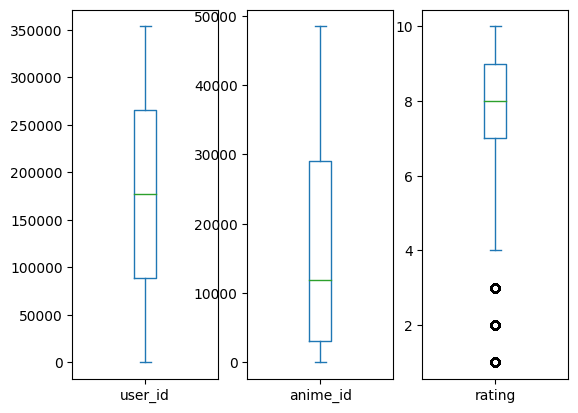

In [66]:
fig, axes = plt.subplots(nrows=1, ncols=3)
ratings_df["user_id"].plot.box(ax=axes[0])
ratings_df["anime_id"].plot.box(ax=axes[1])
ratings_df["rating"].plot.box(ax=axes[2])
plt.show()

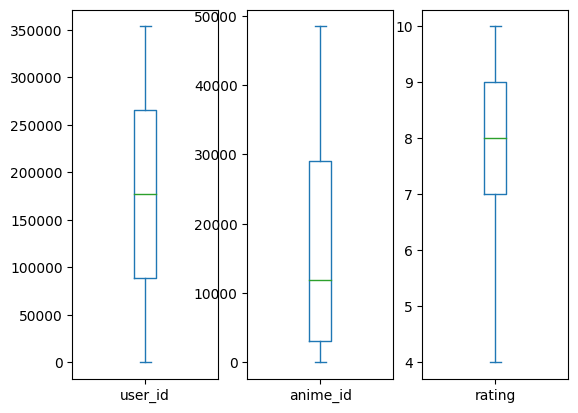

In [67]:
lower_percentile = 0.05

low = ratings_df["rating"].quantile(lower_percentile)
series = ratings_df["rating"]
series[series < low] = low

fig, axes = plt.subplots(nrows=1, ncols=3)
ratings_df["user_id"].plot.box(ax=axes[0])
ratings_df["anime_id"].plot.box(ax=axes[1])
ratings_df["rating"].plot.box(ax=axes[2])
plt.show()

For ratings_df, there were no outliers in the user_id or anime_id columns. However, there were outliers in the rating column. These outliers were people that scored certain anime a 1, 2, or 3. Since low scores are important to a recommendation system (to not recommend those anime), I decided that I should keep them. I decided to set the lower bound of the scores at the 5th percentile so that I can still keep the data from these outlier scores without having to drop them.

## 3.3 - Data Quality and Consistency

### Check for Duplicate records

#### anime_df

In [68]:
anime_df["MAL_ID"].duplicated().any()

False

There are no duplicated anime IDs in the dataset. This is the only column we need to check duplicates for since some anime may be named the same, have similar genres, popularity, and scores

#### ratings_df

It does not make sense to check for duplicates in this dataset because the same user can rate multiple anime, the same anime may be rated by different users, and the same rating may be given to different anime

## 3.4 - Data Preparation for Model Training

### Prepare datasets for model training

In [69]:
anime_df = anime_df.rename(columns={"MAL_ID":"anime_id"})
anime_df

,anime_id,Name,Score,Genres,Popularity
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",39
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",518
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",201
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",1467
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",4369
...,...,...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,0.0,"Adventure, Mystery, Supernatural",13116
17558,48483,Mieruko-chan,0.0,"Comedy, Horror, Supernatural",17562
17559,48488,Higurashi no Naku Koro ni Sotsu,0.0,"Mystery, Dementia, Horror, Psychological, Supe...",17558
17560,48491,Yama no Susume: Next Summit,0.0,"Adventure, Slice of Life, Comedy",17565


In [70]:
ratings_df

,user_id,anime_id,rating
0,0,430,9
1,0,1004,5
2,0,3010,7
3,0,570,7
4,0,2762,9
...,...,...,...
57633273,353404,502,8
57633274,353404,987,4
57633275,353404,225,8
57633276,353404,243,7


In [71]:
model_df = ratings_df.merge(anime_df, on=["anime_id"])
model_df.sort_values(by="user_id")

model_df["user_id"] = model_df["user_id"].astype(str)
model_df

,user_id,anime_id,rating,Name,Score,Genres,Popularity
0,0,430,9,Fullmetal Alchemist: The Conqueror of Shamballa,7.57,"Military, Comedy, Historical, Drama, Fantasy, ...",506
1,6,430,8,Fullmetal Alchemist: The Conqueror of Shamballa,7.57,"Military, Comedy, Historical, Drama, Fantasy, ...",506
2,18,430,10,Fullmetal Alchemist: The Conqueror of Shamballa,7.57,"Military, Comedy, Historical, Drama, Fantasy, ...",506
3,19,430,8,Fullmetal Alchemist: The Conqueror of Shamballa,7.57,"Military, Comedy, Historical, Drama, Fantasy, ...",506
4,33,430,4,Fullmetal Alchemist: The Conqueror of Shamballa,7.57,"Military, Comedy, Historical, Drama, Fantasy, ...",506
...,...,...,...,...,...,...,...
57629739,315549,38853,4,Ex-Arm,2.18,"Action, Sci-Fi, Ecchi, Seinen",2350
57629740,350024,38853,10,Ex-Arm,2.18,"Action, Sci-Fi, Ecchi, Seinen",2350
57629741,311855,39435,6,Oshiri Tantei Movie 1: Curry Naru Jiken,0.0,"Mystery, Comedy, Kids, Fantasy",16923
57629742,334473,35746,4,6 Lovers,0.0,"Comedy, Drama, Romance, School, Shounen Ai, Sl...",4637


In [72]:
ratings = tf.data.Dataset.from_tensor_slices(dict(model_df[["user_id", "Name", "rating"]]))
titles = tf.data.Dataset.from_tensor_slices(dict(anime_df[["Name"]]))

ratings = ratings.map(lambda x: {
    "user_id": x["user_id"],
    "Name": x["Name"],
    "rating": float(x["rating"])
})

titles = titles.map(lambda x: x["Name"])

In [73]:
tf.random.set_seed(100)
shuffle = ratings.shuffle(100_000, reshuffle_each_iteration=False, seed=100)

# Train amount = 0.8 * len(ratings) = 46,103,795
# Test amount = len(ratings) - 46,103,795 = 11,525,949
train = ratings.take(46_103_795)
test = ratings.skip(46_103_795).take(11_525_949)

In [74]:
anime_titles = titles.batch(1_000)
user_ids = ratings.batch(1_000_000).map(lambda x: x["user_id"])

unique_anime_titles = anime_df["Name"].unique().tolist()
unique_user_ids = ratings_df["user_id"].astype(str).unique().tolist()

print("Unique anime:", len(unique_anime_titles))
print("Unique users:", len(unique_user_ids))


Unique anime: 17495
Unique users: 310059


In [75]:
class AnimeModel(tfrs.models.Model):
    def __init__(self, rating_weight, retrieval_weight) -> None:
        super().__init__()
        embedding_dimension = 64

        self.anime_model: tf.keras.layers.Layer = tf.keras.Sequential([
            tf.keras.layers.StringLookup(
                vocabulary=unique_anime_titles, mask_token=None),
            tf.keras.layers.Embedding(len(unique_anime_titles) + 1, embedding_dimension)
        ])

        self.user_model: tf.keras.layers.Layer = tf.keras.Sequential([
            tf.keras.layers.StringLookup(
                vocabulary=unique_user_ids, mask_token=None),
            tf.keras.layers.Embedding(len(unique_user_ids) + 1, embedding_dimension)
        ])

        self.rating_model = tf.keras.Sequential([
            tf.keras.layers.Dense(256, activation="relu"),
            tf.keras.layers.Dense(128, activation="relu"),
            tf.keras.layers.Dense(1)
        ])

        self.rating_task: tf.keras.layers.Layer = tfrs.tasks.Ranking(
            loss=tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError()]
        )
        
        self.retrieval_task: tf.keras.layers.Layer = tfrs.tasks.Retrieval(
            metrics=tfrs.metrics.FactorizedTopK(
                candidates=titles.batch(128).map(self.anime_model)
            )
        )

        self.rating_weight = rating_weight
        self.retrieval_weight = retrieval_weight
    
    def call(self, features: Dict[Text, tf.Tensor]) -> tf.Tensor:
        user_embeddings = self.user_model(features["user_id"])
        anime_embeddings = self.anime_model(features["Name"])

        return(
            user_embeddings,
            anime_embeddings,
            self.rating_model(
                tf.concat([user_embeddings, anime_embeddings], axis=1)
            ),
        )
    
    def compute_loss(self, features: Dict[Text, tf.Tensor], training=False) -> tf.Tensor:
        ratings = features.pop("rating")

        user_embeddings, anime_embeddings, rating_predictions = self(features)

        rating_loss = self.rating_task(
            labels=ratings,
            predictions=rating_predictions
        )
        retrieval_loss = self.retrieval_task(user_embeddings, anime_embeddings)
        return(
            self.rating_weight*rating_loss + self.retrieval_weight*retrieval_loss
        )

In [78]:
model = AnimeModel(rating_weight=1.0, retrieval_weight=1.0)
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(0.1))

cached_train = train.shuffle(100_000).batch(1_000).cache()
cached_test = test.batch(1_000).cache()

model.fit(cached_train, epochs=5)

Epoch 1/5
